Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [ ]:
NAME = ""
STUDENTID = ""
GROUPID = "";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

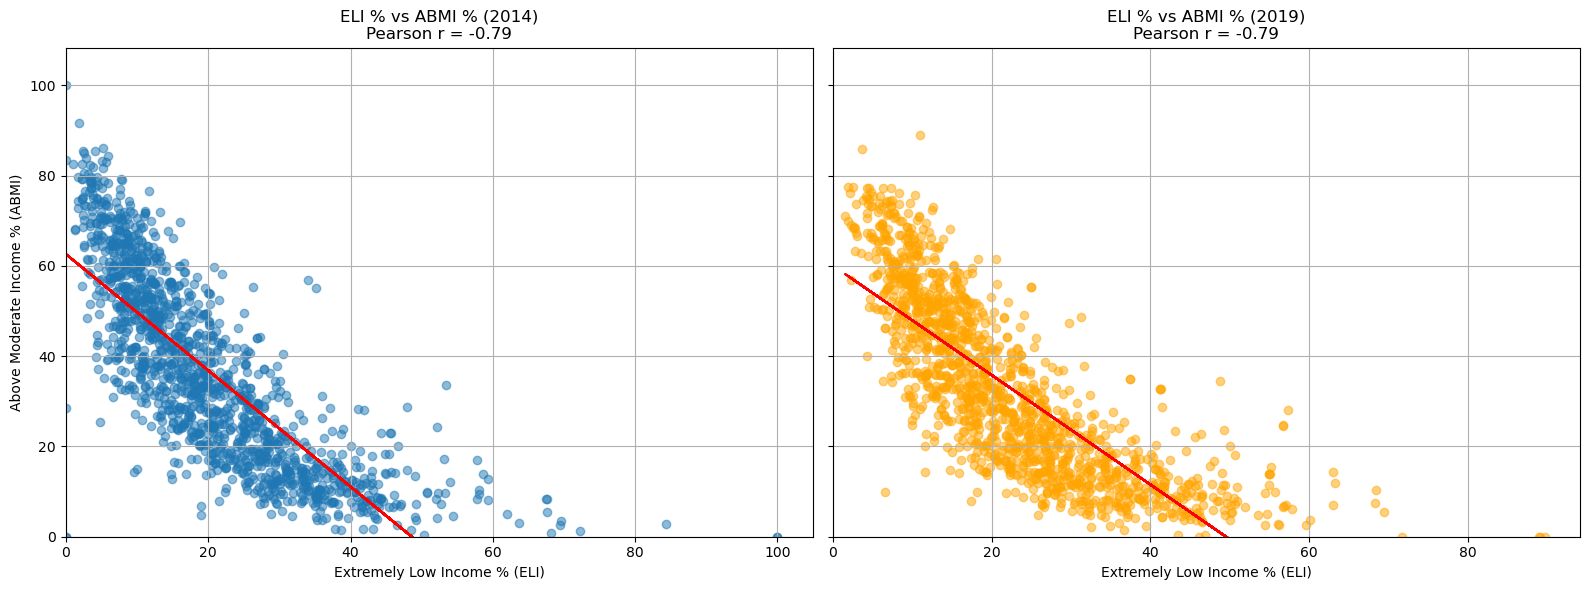

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv("data/data_notebook-notebook-1_dataset1.csv")  # adjust filename if needed

# Filter for 2014 and 2019
df_2014 = df[df['year'] == 2014][['eli_pct', 'abmi_pct']].dropna()
df_2019 = df[df['year'] == 2019][['eli_pct', 'abmi_pct']].dropna()

# Manually compute Pearson correlation
r_2014 = df_2014['eli_pct'].corr(df_2014['abmi_pct'])
r_2019 = df_2019['eli_pct'].corr(df_2019['abmi_pct'])

# Compute regression lines (y = mx + b)
m_2014, b_2014 = np.polyfit(df_2014['eli_pct'], df_2014['abmi_pct'], 1)
m_2019, b_2019 = np.polyfit(df_2019['eli_pct'], df_2019['abmi_pct'], 1)

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 2014 plot
axes[0].scatter(df_2014['eli_pct'], df_2014['abmi_pct'], alpha=0.5)
axes[0].plot(df_2014['eli_pct'], m_2014 * df_2014['eli_pct'] + b_2014, color='red')
axes[0].set_title(f'ELI % vs ABMI % (2014)\nPearson r = {r_2014:.2f}')
axes[0].set_xlabel('Extremely Low Income % (ELI)')
axes[0].set_ylabel('Above Moderate Income % (ABMI)')
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].grid(True)

# 2019 plot
axes[1].scatter(df_2019['eli_pct'], df_2019['abmi_pct'], alpha=0.5, color='orange')
axes[1].plot(df_2019['eli_pct'], m_2019 * df_2019['eli_pct'] + b_2019, color='red')
axes[1].set_title(f'ELI % vs ABMI % (2019)\nPearson r = {r_2019:.2f}')
axes[1].set_xlabel('Extremely Low Income % (ELI)')
axes[1].set_xlim(left=0)
axes[1].set_ylim(bottom=0)
axes[1].grid(True)

plt.tight_layout()
plt.show()

##
#raise NotImplementedError()
import pandas as pd
import matplotlib.pyplot as plt

# Load and merge data
df = pd.read_csv("final_processed_data.csv")
mapping_df = pd.read_csv("census_tract_incomes.csv")

mapping_df['geo_id2'] = mapping_df['geo_id2'].astype(str)
df['geoid20'] = df['geoid20'].astype(str)
df = df.merge(mapping_df, left_on='geoid20', right_on='geo_id2', how='left')
df['county'] = df['name'].str.extract(r',\s*(.*?)\s*County', expand=False) + " County"

# Extract short tract ID
df['tract_id'] = df['geoid20'].str[-6:]

# Calculate exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct'] = df['li_pct'] - df['vli_pct']
df['ex_mi_pct'] = df['mi_pct'] - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']  # assumed to be already exclusive

# Filter for one specific tract (e.g., 128102)
tract_df = df[df['tract_id'] == '128102'].sort_values('year')

# Plot exclusive income groups over time as separate lines
exclusive_cols = ['ex_eli_pct', 'ex_vli_pct', 'ex_li_pct', 'ex_mi_pct', 'ex_abmi_pct']
labels = ['ELI', 'VLI', 'LI', 'MI', 'ABMI']

plt.figure(figsize=(10, 6))
for col, label in zip(exclusive_cols, labels):
    plt.plot(tract_df['year'], tract_df[col], marker='o', label=label)

plt.title('Exclusive Income Group Trends Over Time\nCensus Tract 1281.02, Los Angeles County')
plt.xlabel('Year')
plt.ylabel('Exclusive Share of Households (%)')
plt.legend(title='Income Group')
plt.grid(True)
plt.tight_layout()
plt.show()


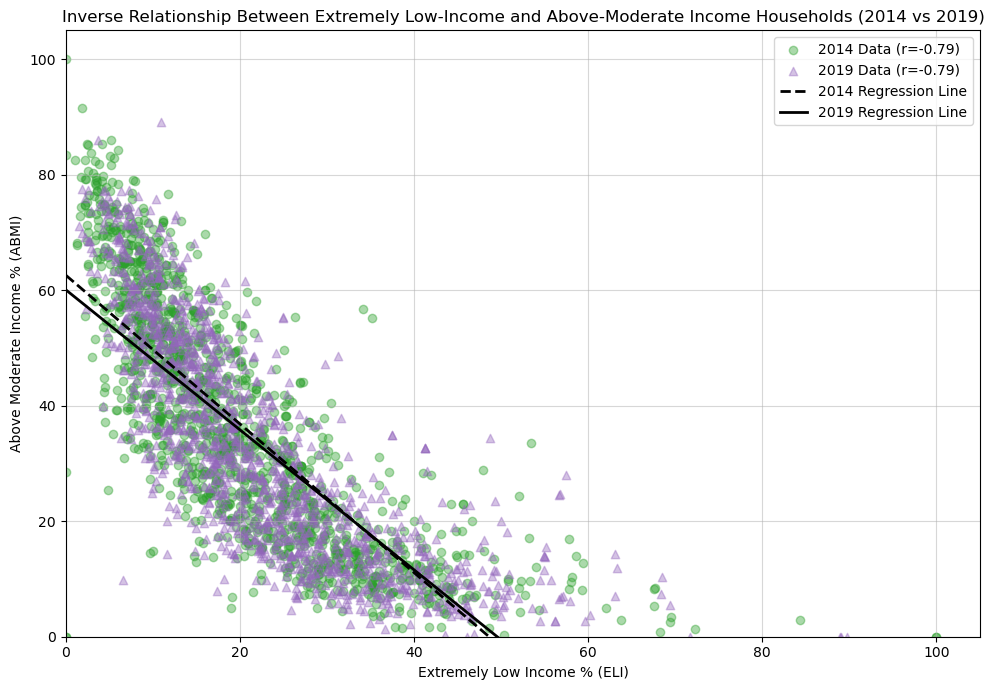

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import os
import traceback # Import traceback for detailed error printing

# --- Define File Path ---
data_folder = 'data'
# Make sure this filename matches exactly, including case sensitivity if needed
file_name = 'data_notebook-notebook-1_dataset2.json'
file_path = os.path.join(data_folder, file_name)

try:
    # --- Data Loading ---
    print(f"Attempting to load data from: {file_path}")
    df = pd.read_json(file_path)
    print(f"Successfully loaded {len(df)} records.")

    # --- Data Processing ---
    required_cols = ['crm_cd_desc', 'date_occ']
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # --- Date Conversion ---
    print("\n--- Converting Dates ---")
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    nat_count = df['date_occ'].isna().sum()
    if nat_count > 0:
        print(f"Warning: {nat_count} rows had invalid date formats and were coerced to NaT.")
    # Keep a copy before dropping NaNs for full date range calculation later
    df_with_dates = df.dropna(subset=['date_occ']).copy()
    print(f"{len(df_with_dates)} records remaining after removing NaT dates.")
    if df_with_dates.empty: raise ValueError("No valid dates found after conversion.")
    min_date, max_date = df_with_dates['date_occ'].min(), df_with_dates['date_occ'].max()
    print(f"Full date range after conversion: {min_date} to {max_date}")

    # --- DIAGNOSTIC: Check 2013 data AFTER date cleaning ---
    print("\n--- Checking 2013 Data After Date Cleaning ---")
    df_2013_after_date_clean = df_with_dates[df_with_dates['date_occ'].dt.year == 2013].copy() # Use .copy()
    print(f"Number of records dated 2013 after date cleaning: {len(df_2013_after_date_clean)}")
    if not df_2013_after_date_clean.empty:
        print("Sample 2013 crime descriptions (before top 5 filter):")
        print(df_2013_after_date_clean['crm_cd_desc'].value_counts().head(10))
    # --- END DIAGNOSTIC ---

    # --- Top 5 Crimes (Calculated on the *entire* valid date range) ---
    # Drop NaNs in crime description *before* calculating top 5
    df_cleaned = df_with_dates.dropna(subset=['crm_cd_desc']).copy()
    print(f"\n{len(df_cleaned)} records remaining after removing NaN crime descriptions.")
    crime_counts = df_cleaned['crm_cd_desc'].value_counts()
    if crime_counts.empty: raise ValueError("No crime descriptions found.")
    top_5_crime_list = crime_counts.head(5).index.tolist()
    print(f"\nOverall Top 5 Crime Types (based on {min_date.year}-{max_date.year} dataset): {top_5_crime_list}")

    # --- Filter DataFrame for Top 5 Crimes ---
    df_top5 = df_cleaned[df_cleaned['crm_cd_desc'].isin(top_5_crime_list)].copy()
    print(f"\n{len(df_top5)} records belong to the overall top 5 crime types.")
    if df_top5.empty: raise ValueError("No records found matching the top 5 crimes.")

    # --- DIAGNOSTIC: Check 2013 data AFTER top 5 filter ---
    print("\n--- Checking 2013 Data After Top 5 Filter ---")
    df_top5_2013 = df_top5[df_top5['date_occ'].dt.year == 2013]
    print(f"Number of Top 5 crime records dated 2013: {len(df_top5_2013)}")
    if not df_top5_2013.empty:
         print("Crime descriptions in 2013 (Top 5 Filtered):")
         print(df_top5_2013['crm_cd_desc'].value_counts())
    else:
         print("Conclusion: No records from 2013 matched the overall Top 5 crime list.")
         if not df_2013_after_date_clean.empty:
             print("This means the crimes that *did* occur in 2013 were not among the overall top 5.")
    # --- END DIAGNOSTIC ---

    # --- Aggregate Yearly ---
    df_top5.set_index('date_occ', inplace=True)
    if not isinstance(df_top5.index, pd.DatetimeIndex):
         raise TypeError("Index is not DatetimeIndex before resampling.")

    # --- DIAGNOSTIC: Check index before resampling ---
    print("\n--- Index Check Before Resampling ---")
    if not df_top5.empty:
        print(f"Index min: {df_top5.index.min()}, Index max: {df_top5.index.max()}")
        print(f"Is 2013 present in the index of df_top5? {'Yes' if any(df_top5.index.year == 2013) else 'No'}")
    else:
        print("df_top5 is empty before resampling.")
    # --- END DIAGNOSTIC ---

    crime_over_time = df_top5.groupby([pd.Grouper(freq='YE'), 'crm_cd_desc']).size()

    # --- Restructure ---
    crime_pivot = crime_over_time.unstack(level='crm_cd_desc', fill_value=0)
    for crime in top_5_crime_list:
        if crime not in crime_pivot.columns: crime_pivot[crime] = 0

    # --- REINDEX TO FULL DATE RANGE ---
    # Use the min/max dates calculated earlier from df_with_dates
    print("\n--- Reindexing Pivot Table to Full Date Range ---")
    if not df_with_dates.empty:
        # Create a complete DatetimeIndex for every year end in the full range
        all_years_index = pd.date_range(start=min_date, end=max_date, freq='YE')

        print(f"Original pivot index range: {crime_pivot.index.min().year if not crime_pivot.empty else 'N/A'} to {crime_pivot.index.max().year if not crime_pivot.empty else 'N/A'}")
        print(f"Expected full range based on data: {all_years_index.min().year} to {all_years_index.max().year}")

        # Reindex the pivot table using the complete yearly index.
        # Missing years will be added with the specified fill_value (0).
        crime_pivot = crime_pivot.reindex(all_years_index, fill_value=0)

        print("Pivot table index after reindexing:")
        print(crime_pivot.index)
        print("\nFirst few rows after reindexing (should include earliest years):")
        print(crime_pivot.head())
    else:
        print("Skipping reindexing because initial date processing failed.")
    # --- END REINDEX ---


    # --- DIAGNOSTIC: Check Pivot Table for 2013 ---
    print("\n--- Checking Pivot Table for 2013 (After Reindex) ---")
    year_end_2013 = pd.Timestamp('2013-12-31')
    if year_end_2013 in crime_pivot.index:
        print("Row for 2013-12-31 in final pivot table:")
        print(crime_pivot.loc[year_end_2013])
    else:
        # This should only happen now if 2013 was outside the min/max date range
        print("No index entry found for 2013-12-31 in the final pivot table.")
    # --- END DIAGNOSTIC ---


    # --- Pre-Plot Checks ---
    print("\n--- Pre-Plot Data Check ---")
    print("Pivot table info:")
    crime_pivot.info()
    print("\nFirst 5 rows of pivot table:")
    print(crime_pivot.head())
    print(f"\nPivot index type: {type(crime_pivot.index)}, dtype: {crime_pivot.index.dtype}")
    if crime_pivot.empty: raise ValueError("Pivot table is empty.")
    if not isinstance(crime_pivot.index, pd.DatetimeIndex): print("Warning: Pivot index not DatetimeIndex.")
    # Check if all plotted values are zero AFTER reindexing
    if not crime_pivot.empty and (crime_pivot[top_5_crime_list].values == 0).all():
        print("Warning: All data values in the pivot table for top 5 crimes are zero (possibly after reindexing).")


    # --- Visualization ---
    print("\n--- Plotting ---")
    if crime_pivot.empty:
        print("Cannot plot, pivot table is empty.")
    else:
        # Get range from the potentially reindexed pivot table
        plot_min_year = crime_pivot.index.min().year
        plot_max_year = crime_pivot.index.max().year
        print(f"Plotting data from {plot_min_year} to {plot_max_year}")

        fig, ax = plt.subplots(figsize=(15, 8))

        # Plot using ax.plot directly
        markers = ['o', 's', '^', 'D', 'v'] # Different marker for each line
        for i, crime in enumerate(top_5_crime_list):
            if crime in crime_pivot.columns:
                 # Ensure index and values are passed correctly
                 ax.plot(crime_pivot.index, crime_pivot[crime], marker=markers[i % len(markers)], linestyle='-', label=crime)
            else:
                 print(f"Warning: Column '{crime}' not found in pivot table for plotting.")

        # --- Customize Plot ---
        ax.set_title('Yearly Frequency of Top 5 Crime Types Over Time')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Reported Incidents')
        ax.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.set_ylim(bottom=0) # Keep Y starting at 0

        # --- X-axis Limit and Tick Handling ---
        # Set the locator and formatter *after* plotting
        ax.xaxis.set_major_locator(mdates.YearLocator(base=1)) # Ensure ticks are on the year
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Optional: Explicitly set limits if needed, using padding
        # plot_start_date = crime_pivot.index.min() - pd.Timedelta(days=180)
        # plot_end_date = crime_pivot.index.max() + pd.Timedelta(days=180)
        # ax.set_xlim(plot_start_date, plot_end_date)
        # # Re-apply locator/formatter if xlim changed things significantly
        # ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
        # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        plt.xticks(rotation=0, ha='center') # Horizontal labels for years
        # Adjust layout to prevent labels/legend overlapping
        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Shrink plot area slightly for legend
        plt.show()

# --- Error Handling ---
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    print("Please ensure the 'data' folder exists in the same directory and the filename is correct.")
except ValueError as ve:
    print(f"Data Processing Error: {ve}")
    traceback.print_exc() # Show traceback for ValueErrors
except TypeError as te:
     print(f"Type Error: {te}")
     traceback.print_exc() # Show traceback for TypeErrors
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    traceback.print_exc() # Print detailed traceback for any other errors

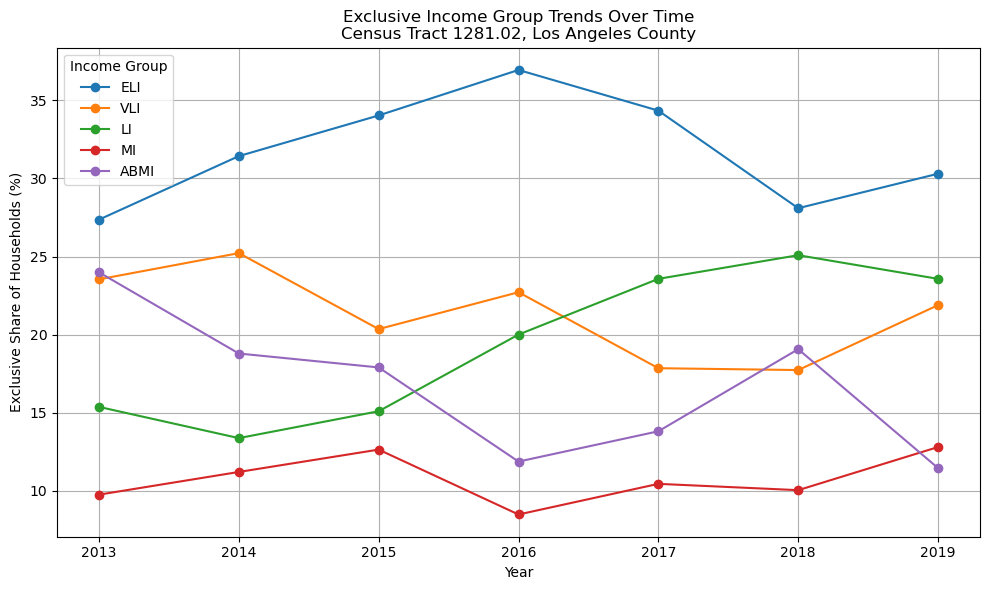

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and merge data
df = pd.read_csv("final_processed_data.csv")
mapping_df = pd.read_csv("census_tract_incomes.csv")

mapping_df['geo_id2'] = mapping_df['geo_id2'].astype(str)
df['geoid20'] = df['geoid20'].astype(str)
df = df.merge(mapping_df, left_on='geoid20', right_on='geo_id2', how='left')
df['county'] = df['name'].str.extract(r',\s*(.*?)\s*County', expand=False) + " County"

# Extract short tract ID
df['tract_id'] = df['geoid20'].str[-6:]

# Calculate exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct'] = df['li_pct'] - df['vli_pct']
df['ex_mi_pct'] = df['mi_pct'] - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']  # assumed to be already exclusive

# Filter for one specific tract (e.g., 128102)
tract_df = df[df['tract_id'] == '128102'].sort_values('year')

# Plot exclusive income groups over time as separate lines
exclusive_cols = ['ex_eli_pct', 'ex_vli_pct', 'ex_li_pct', 'ex_mi_pct', 'ex_abmi_pct']
labels = ['ELI', 'VLI', 'LI', 'MI', 'ABMI']

plt.figure(figsize=(10, 6))
for col, label in zip(exclusive_cols, labels):
    plt.plot(tract_df['year'], tract_df[col], marker='o', label=label)

plt.title('Exclusive Income Group Trends Over Time\nCensus Tract 1281.02, Los Angeles County')
plt.xlabel('Year')
plt.ylabel('Exclusive Share of Households (%)')
plt.legend(title='Income Group')
plt.grid(True)
plt.tight_layout()
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

In [6]:
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os  # Import os module for path manipulation

# --- Define File Path ---
data_folder = 'data'
file_name = 'data_notebook-notebook-1_dataset2.json'
# Construct the full path regardless of operating system
file_path = os.path.join(data_folder, file_name)

try:
    # --- Data Loading from JSON ---
    print(f"Attempting to load data from: {file_path}")
    # Use pd.read_json to load the file
    # Assumes the JSON is a list of records (dictionaries)
    df = pd.read_json(file_path)
    print(f"Successfully loaded {len(df)} records.")
    # Optional: Display first few rows and columns to verify
    # print("DataFrame columns:", df.columns.tolist())
    # print("First 5 rows:\n", df.head())

    # --- Data Processing ---

    # Make sure the required columns exist
    required_cols = ['crm_cd_desc', 'date_occ']
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        raise ValueError(f"Missing required columns in JSON file: {missing}")

    # 1. Convert 'date_occ' to datetime objects, coercing errors
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    # Remove rows where date conversion failed or date is missing
    df.dropna(subset=['date_occ'], inplace=True)
    print(f"{len(df)} records remaining after date cleaning.")

    # 2. Find the overall Top 5 crime types
    # Handle potential NaN/None values in crime description before value_counts
    df.dropna(subset=['crm_cd_desc'], inplace=True)
    crime_counts = df['crm_cd_desc'].value_counts()
    if crime_counts.empty:
        print("No crime descriptions found after cleaning. Cannot proceed.")
        exit()

    top_5_crime_list = crime_counts.head(5).index.tolist()
    print(f"Top 5 Crime Types determined: {top_5_crime_list}")

    # 3. Filter the DataFrame to include only the top 5 crimes
    df_top5 = df[df['crm_cd_desc'].isin(top_5_crime_list)].copy() # Use .copy() for safety
    print(f"{len(df_top5)} records belong to the top 5 crime types.")

    if df_top5.empty:
        print("No data records found for the top 5 crime types. Cannot create plot.")
        exit()

    # 4. Aggregate counts over time (e.g., monthly) for these crimes
    # Set date as index for easy resampling
    df_top5.set_index('date_occ', inplace=True)

    # Resample to monthly frequency ('ME' for Month End) and count occurrences per crime type
    # Use 'ME' for Month End frequency. Adjust 'YE' for Year End, 'QE' for Quarter End etc. if needed.
    # Group temporary by the resampled index AND the crime description
    crime_over_time = df_top5.groupby([pd.Grouper(freq='ME'), 'crm_cd_desc']).size()

    # 5. Restructure data for plotting: Use unstack() to turn crime types into columns
    # This creates a DataFrame where rows are time periods and columns are crime types
    crime_pivot = crime_over_time.unstack(level='crm_cd_desc', fill_value=0)

    # Ensure all top 5 crimes are columns, even if they had 0 counts in some periods
    for crime in top_5_crime_list:
        if crime not in crime_pivot.columns:
            crime_pivot[crime] = 0 # Add the column with zeros if missing

    # --- Visualization ---
    if crime_pivot.empty:
         print("No data available for the top 5 crimes in the selected time range to plot.")
    else:
        print("\nData prepared for plotting (first 5 rows):")
        print(crime_pivot.head())
        print(f"\nPlotting data from {crime_pivot.index.min()} to {crime_pivot.index.max()}")

        # Create the line chart
        ax = crime_pivot[top_5_crime_list].plot(kind='line', figsize=(15, 8), marker='.') # Added markers

        # --- Customize Plot ---
        ax.set_title('Monthly Frequency of Top 5 Crime Types Over Time')
        ax.set_xlabel('Month')
        ax.set_ylabel('Number of Reported Incidents')
        # Place legend outside of the plot area to avoid obscuring lines
        ax.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25) # Fainter grid lines

        # Ensure y-axis shows integer counts starting from 0
        ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.set_ylim(bottom=0)

        plt.xticks(rotation=45, ha='right') # Rotate labels and align them
        # Adjust layout automatically to make space for labels and legend
        # The rect parameter shrinks the plot area slightly to fit the legend: [left, bottom, right, top]
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        # --- Display Plot ---
        plt.show()

# --- Error Handling ---
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    print("Please ensure the 'data' folder exists in the same directory as the script and contains the file.")
except ValueError as ve: # Catches errors from missing columns or date parsing issues
    print(f"Data Processing Error: {ve}")
except Exception as T:
    # Catch any other unexpected errors during loading or processing
    print(f"An unexpected error occurred: {T}")
    # print("Check JSON file format, permissions, and data integrity.")
###raise NotImplementedError()

Attempting to load data from: data/data_notebook-notebook-1_dataset2.json
Successfully loaded 10000 records.
10000 records remaining after date cleaning.
Top 5 Crime Types determined: ['BATTERY - SIMPLE ASSAULT', 'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)']
3771 records belong to the top 5 crime types.
Data Processing Error: Invalid frequency: ME


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [34]:
import pandas as pd
import geopandas as gpd
import json
import warnings

# Suppress specific warnings if they become noisy, e.g., from sjoin_nearest
# warnings.filterwarnings('ignore', message='.*pandas.Int64Index.*')

print("Starting script...")

# --- STEP 0: Load Data ---
print("Loading data...")
try:
    # Load crime data from JSON
    with open("data_notebook-notebook-1_dataset2.json", 'r') as f:
        try:
            crime_data_list = json.load(f)
        except json.JSONDecodeError:
            print("Reading JSON as JSON Lines format.")
            f.seek(0)
            crime_data_list = [json.loads(line.strip()) for line in f if line.strip()]

    crime_df = pd.DataFrame(crime_data_list)
    print(f"Loaded {len(crime_df)} crime records.")

    # Load centroids data
    centroids_df = pd.read_csv("CA_tract_centroids_2020.csv.txt")
    print(f"Loaded {len(centroids_df)} centroid records.")

    # --- Optional: Load the geoid lookup table ---
    # (Keeping this part as it was, though not strictly needed for the join itself)
    try:
        geoid_lookup_df = pd.read_csv("final_processed_data.csv")
        print(f"Loaded {len(geoid_lookup_df)} geoid lookup records (from final_processed_data).")
    except FileNotFoundError:
        print("Optional GEOID lookup file ('final_processed_data.csv') not found, proceeding without it.")
        geoid_lookup_df = None
    except Exception as e:
        print(f"Error loading optional GEOID lookup file: {e}. Proceeding without it.")
        geoid_lookup_df = None

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Make sure the input file paths are correct.")
    exit()
except json.JSONDecodeError as e:
    print(f"Error decoding JSON file: {e}. Check the JSON format.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    exit()

# --- STEP 1: Prepare Centroids Data ---
print("Preparing centroids data...")
try:
    centroids_df['geoid'] = (
        centroids_df['STATEFP'].astype(str).str.zfill(2) +
        centroids_df['COUNTYFP'].astype(str).str.zfill(3) +
        centroids_df['TRACTCE'].astype(str).str.zfill(6)
    )
    centroids_prep_df = centroids_df[['geoid', 'LATITUDE', 'LONGITUDE']].copy()
    print("Generated GEOIDs for centroids.")
except KeyError as e:
    print(f"Error preparing centroids: Missing expected column - {e}")
    exit()
except Exception as e:
     print(f"An error occurred during centroid preparation: {e}")
     exit()

# --- STEP 2: Prepare Crime Data ---
print("Preparing crime data...")
if 'lat' not in crime_df.columns or 'lon' not in crime_df.columns:
    print("Error: Crime data is missing 'lat' or 'lon' columns.")
    exit()

crime_df['lat_str'] = crime_df['lat'].astype(str).str.replace('"', '')
crime_df['lon_str'] = crime_df['lon'].astype(str).str.replace('"', '')
crime_df['lat_numeric'] = pd.to_numeric(crime_df['lat_str'], errors='coerce')
crime_df['lon_numeric'] = pd.to_numeric(crime_df['lon_str'], errors='coerce')

original_crime_count = len(crime_df)
crime_df.dropna(subset=['lat_numeric', 'lon_numeric'], inplace=True)
dropped_count = original_crime_count - len(crime_df)
if dropped_count > 0:
    print(f"Dropped {dropped_count} crime records due to invalid/missing coordinates.")

if crime_df.empty:
    print("Error: No valid crime records remaining after cleaning coordinates.")
    exit()
print("Cleaned crime coordinates.")

# --- STEP 3: Convert to GeoDataFrames (Initial CRS) ---
print("Converting to GeoDataFrames with initial CRS (EPSG:4326)...")
try:
    crime_gdf = gpd.GeoDataFrame(
        crime_df,
        geometry=gpd.points_from_xy(crime_df.lon_numeric, crime_df.lat_numeric),
        crs="EPSG:4326"  # WGS84 - standard for lat/lon
    )
    print("Created crime GeoDataFrame.")

    centroids_gdf = gpd.GeoDataFrame(
        centroids_prep_df,
        geometry=gpd.points_from_xy(centroids_prep_df.LONGITUDE, centroids_prep_df.LATITUDE),
        crs="EPSG:4326" # WGS84
    )
    print("Created centroids GeoDataFrame.")
except Exception as e:
    print(f"Error creating GeoDataFrames: {e}")
    exit()

# --- STEP 4: Reproject to a Suitable Projected CRS ---
# Using EPSG:3310 (NAD83 / California Albers) - good for statewide area/distance
projected_crs = "EPSG:3310"
print(f"Reprojecting GeoDataFrames to {projected_crs} for accurate distance calculation...")
try:
    crime_gdf_proj = crime_gdf.to_crs(projected_crs)
    centroids_gdf_proj = centroids_gdf.to_crs(projected_crs)
    print("Reprojection complete.")
except Exception as e:
    print(f"Error during reprojection: {e}")
    exit()

# --- STEP 5: Perform Spatial Join (Nearest Neighbor) on Projected Data ---
print("Performing spatial join (finding nearest centroid for each crime using projected data)...")
try:
    # Perform the join on the *projected* dataframes
    # We still want the final output to contain original columns + geoid from the *original* centroids GDF
    # So, we join the projected crime data with the projected centroids,
    # then use the index to merge the correct 'geoid' back from the original centroids_gdf

    # Keep only essential columns for joining from centroids_proj to avoid duplicate columns later
    centroids_join_data = centroids_gdf_proj[['geometry']] # Keep only geometry for joining

    crimes_joined_proj = gpd.sjoin_nearest(
        crime_gdf_proj,
        centroids_join_data, # Join only with geometry of projected centroids
        how='left',
        distance_col="distance_meters" # Distance will now be in meters
    )

    # The result 'crimes_joined_proj' has the original crime data, its projected geometry,
    # 'index_right' (linking to centroids_gdf_proj's index), and 'distance_meters'.
    # Now, use 'index_right' to get the correct 'geoid' from the original centroids_gdf.
    # Make sure the index of centroids_gdf is clean (it should be by default)
    centroids_gdf = centroids_gdf.reset_index(drop=True) # Ensure index is 0, 1, 2...

    # Merge the geoid based on the index found by sjoin_nearest
    # The 'index_right' column in crimes_joined_proj corresponds to the index in centroids_gdf_proj,
    # which should be the same as the index in the original centroids_gdf if we reset it.
    crimes_with_geoids_final = crimes_joined_proj.merge(
        centroids_gdf[['geoid']], # Select only the geoid column
        left_on='index_right',
        right_index=True, # Merge based on the index of centroids_gdf
        how='left'
    )

    print(f"Spatial join complete. Found nearest tracts for {len(crimes_with_geoids_final)} crimes.")
    print("Distances calculated in meters using projected CRS.")

except Exception as e:
    print(f"Error during spatial join or merging geoid: {e}")
    print(f"Crime Proj GDF Info:\n{crime_gdf_proj.info() if 'crime_gdf_proj' in locals() else 'Not created'}")
    print(f"Centroids Proj GDF Info:\n{centroids_gdf_proj.info() if 'centroids_gdf_proj' in locals() else 'Not created'}")
    exit()

# --- STEP 6: Clean Up and Save Output ---
print("Cleaning up and saving results...")

# Define columns to keep: original crime columns + the matched 'geoid' + distance in meters
original_cols = list(pd.DataFrame(crime_data_list).columns) # Use the original list structure

# Columns added by the process that we might want to keep or discard
added_cols = ['geoid', 'distance_meters'] # Keep geoid and the new distance
# Note: 'distance_to_centroid' from previous run is now 'distance_meters'

# We need to select from 'crimes_with_geoids_final'
# Drop intermediate/geo/temporary cols
cols_to_drop = ['geometry', 'lat_str', 'lon_str', 'lat_numeric', 'lon_numeric', 'index_right']

# Create the final dataframe
final_df = crimes_with_geoids_final.copy()

# Select the columns we want
cols_to_keep = original_cols + added_cols
# Ensure we only keep columns that actually exist in the joined dataframe
final_cols = [col for col in cols_to_keep if col in final_df.columns]

# Keep only the desired columns and drop others
final_df = final_df[final_cols]

# Optional: Rename the matched geoid column if desired
# final_df.rename(columns={'geoid': 'census_tract_geoid'}, inplace=True)

# Save the result to a CSV file
output_filename = "crimes_with_geoids_projected.csv" # Changed filename to reflect method
try:
    final_df.to_csv(output_filename, index=False)
    print(f"✅ Successfully saved {len(final_df)} records to {output_filename}")
    # Display first few rows of the output
    print("\nFirst 5 rows of the output:")
    print(final_df.head())
    # Display info about the output
    print("\nOutput DataFrame Info:")
    final_df.info()

except Exception as e:
    print(f"Error saving the output file: {e}")

print("\nScript finished.")


# YOUR CODE HERE



# STEP 0: Load all required files
csv_df = pd.read_csv("final_processed_data.csv")
json_df = pd.read_json("data_notebook-notebook-1_dataset2.json")
centroids = pd.read_csv("CA_tract_centroids_2020.csv.txt")

# STEP 1: Generate geoid for centroids
centroids['geoid'] = (
    centroids['STATEFP'].astype(str).str.zfill(2) +
    centroids['COUNTYFP'].astype(str).str.zfill(3) +
    centroids['TRACTCE'].astype(str).str.zfill(6)
)

# STEP 2: Merge coordinates into CSV
csv_df = csv_df.merge(
    centroids[['geoid', 'LATITUDE', 'LONGITUDE']],
    on='geoid',
    how='left'
)

# STEP 3: Prepare lat/lon columns for fuzzy matching
csv_df["lat"] = csv_df["LATITUDE"].round(4)
csv_df["lon"] = csv_df["LONGITUDE"].round(4)
json_df["lat"] = json_df["lat"].astype(float).round(4)
json_df["lon"] = json_df["lon"].astype(float).round(4)


# STEP 4: Merge CSV + JSON on coordinates
merged_df = pd.merge(csv_df, json_df, on=['lat', 'lon'], how='inner')

# STEP 5: Save output
merged_df.to_csv("merged_output.csv", index=False)

print("✅ Merged successfully! Rows in final file:", len(merged_df))

import pandas as pd

# STEP 1: Load the dataset
df = pd.read_csv("final_processed_data.csv")  # adjust filename if needed

# STEP 2: Calculate exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct']  = df['li_pct']  - df['vli_pct']
df['ex_mi_pct']  = df['mi_pct']  - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']  # assumed to be already exclusive

# STEP 3: Define weights for each exclusive income group
score_map = {
    'ex_eli_pct': -1.0,
    'ex_vli_pct': -0.5,
    'ex_li_pct': 0.0,
    'ex_mi_pct': 0.5,
    'ex_abmi_pct': 1.0
}

# STEP 4: Calculate a financial score for each row (geoid-year)
df['financial_score'] = (
    df['ex_eli_pct'] * score_map['ex_eli_pct'] +
    df['ex_vli_pct'] * score_map['ex_vli_pct'] +
    df['ex_li_pct']  * score_map['ex_li_pct'] +
    df['ex_mi_pct']  * score_map['ex_mi_pct'] +
    df['ex_abmi_pct'] * score_map['ex_abmi_pct']
) / 100  # normalize to range ~ -1 to +1

# STEP 5: For each geoid, compute score change from first year to last
score_change = (
    df.sort_values('year')
      .groupby('geoid')['financial_score']
      .agg(['first', 'last'])
)
score_change['change'] = score_change['last'] - score_change['first']

# STEP 6: Sort by most drastic change (absolute value), get top 5
top_changers = (
    score_change.reindex(score_change['change'].abs().sort_values(ascending=False).index)
    .head(5)
    .reset_index()
)

# STEP 7: Display the result
print("Top 5 Census Tracts (geoids) with Most Drastic Financial Change (corrected):")
print(top_changers.round(4))

######################now we are gonna translate the geoids into stuff 

import pandas as pd

# Load the .txt file as if it were a CSV
centroids = pd.read_csv("CA_tract_centroids_2020.csv.txt")

# Combine STATEFP + COUNTYFP + TRACTCE to create the full 11-digit geoid
centroids['geoid'] = (
    centroids['STATEFP'].astype(str).str.zfill(2) +
    centroids['COUNTYFP'].astype(str).str.zfill(3) +
    centroids['TRACTCE'].astype(str).str.zfill(6)
)

# 1. Extract the 11-digit GEOID from the long geoid string in top_changers
top_changers['geoid_clean'] = top_changers['geoid'].str.extract(r'US(\d{11})')

# 2. Merge the coordinates from the centroids
top_changers_with_coords = top_changers.merge(
    centroids[['geoid', 'LATITUDE', 'LONGITUDE']],
    left_on='geoid_clean',
    right_on='geoid',
    how='left'
)

# Rename to avoid confusion before display
top_changers_with_coords = top_changers_with_coords.rename(columns={
    'geoid_x': 'full_geoid',
    'geoid_y': 'short_geoid'
})

# Display cleaned version
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]

# 3. Show final table
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]




Starting script...
Loading data...
Loaded 10000 crime records.
Loaded 9129 centroid records.
Loaded 10000 geoid lookup records (from final_processed_data).
Preparing centroids data...
Generated GEOIDs for centroids.
Preparing crime data...
Cleaned crime coordinates.
Converting to GeoDataFrames with initial CRS (EPSG:4326)...
Created crime GeoDataFrame.
Created centroids GeoDataFrame.
Reprojecting GeoDataFrames to EPSG:3310 for accurate distance calculation...
Reprojection complete.
Performing spatial join (finding nearest centroid for each crime using projected data)...
Spatial join complete. Found nearest tracts for 10000 crimes.
Distances calculated in meters using projected CRS.
Cleaning up and saving results...
✅ Successfully saved 10000 records to crimes_with_geoids_projected.csv

First 5 rows of the output:
       dr_no                date_rptd                 date_occ time_occ area  \
0  141121685  2014-12-30T00:00:00.000  2014-05-11T00:00:00.000     0001   11   
1  180217770  2

,full_geoid,geoid_clean,short_geoid,LATITUDE,LONGITUDE,change
0,1400000US06037207400,06037207400,06037207400,34.057246,-118.245131,1.209459
1,1400000US06037980011,06037980011,06037980011,33.787466,-118.214490,-0.897436
2,1400000US06037434004,06037434004,06037434004,34.040862,-118.031065,-0.504921
3,1400000US06037297601,06037297601,06037297601,33.712228,-118.287784,-0.462575
4,1400000US06037294110,06037294110,06037294110,33.799087,-118.260875,-0.431809


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE



# STEP 0: Load all required files
csv_df = pd.read_csv("final_processed_data.csv")
json_df = pd.read_json("data_notebook-notebook-1_dataset2.json")
centroids = pd.read_csv("CA_tract_centroids_2020.csv.txt")

# STEP 1: Generate geoid for centroids
centroids['geoid'] = (
    centroids['STATEFP'].astype(str).str.zfill(2) +
    centroids['COUNTYFP'].astype(str).str.zfill(3) +
    centroids['TRACTCE'].astype(str).str.zfill(6)
)

# STEP 2: Merge coordinates into CSV
csv_df = csv_df.merge(
    centroids[['geoid', 'LATITUDE', 'LONGITUDE']],
    on='geoid',
    how='left'
)

# STEP 3: Prepare lat/lon columns for fuzzy matching
csv_df["lat"] = csv_df["LATITUDE"].round(4)
csv_df["lon"] = csv_df["LONGITUDE"].round(4)
json_df["lat"] = json_df["lat"].astype(float).round(4)
json_df["lon"] = json_df["lon"].astype(float).round(4)


# STEP 4: Merge CSV + JSON on coordinates
merged_df = pd.merge(csv_df, json_df, on=['lat', 'lon'], how='inner')

# STEP 5: Save output
merged_df.to_csv("merged_output.csv", index=False)

print("✅ Merged successfully! Rows in final file:", len(merged_df))

import pandas as pd

# STEP 1: Load the dataset
df = pd.read_csv("final_processed_data.csv")  # adjust filename if needed

# STEP 2: Calculate exclusive income group percentages
df['ex_eli_pct'] = df['eli_pct']
df['ex_vli_pct'] = df['vli_pct'] - df['eli_pct']
df['ex_li_pct']  = df['li_pct']  - df['vli_pct']
df['ex_mi_pct']  = df['mi_pct']  - df['li_pct']
df['ex_abmi_pct'] = df['abmi_pct']  # assumed to be already exclusive

# STEP 3: Define weights for each exclusive income group
score_map = {
    'ex_eli_pct': -1.0,
    'ex_vli_pct': -0.5,
    'ex_li_pct': 0.0,
    'ex_mi_pct': 0.5,
    'ex_abmi_pct': 1.0
}

# STEP 4: Calculate a financial score for each row (geoid-year)
df['financial_score'] = (
    df['ex_eli_pct'] * score_map['ex_eli_pct'] +
    df['ex_vli_pct'] * score_map['ex_vli_pct'] +
    df['ex_li_pct']  * score_map['ex_li_pct'] +
    df['ex_mi_pct']  * score_map['ex_mi_pct'] +
    df['ex_abmi_pct'] * score_map['ex_abmi_pct']
) / 100  # normalize to range ~ -1 to +1

# STEP 5: For each geoid, compute score change from first year to last
score_change = (
    df.sort_values('year')
      .groupby('geoid')['financial_score']
      .agg(['first', 'last'])
)
score_change['change'] = score_change['last'] - score_change['first']

# STEP 6: Sort by most drastic change (absolute value), get top 5
top_changers = (
    score_change.reindex(score_change['change'].abs().sort_values(ascending=False).index)
    .head(5)
    .reset_index()
)

# STEP 7: Display the result
print("Top 5 Census Tracts (geoids) with Most Drastic Financial Change (corrected):")
print(top_changers.round(4))

######################now we are gonna translate the geoids into stuff 

import pandas as pd

# Load the .txt file as if it were a CSV
centroids = pd.read_csv("CA_tract_centroids_2020.csv.txt")

# Combine STATEFP + COUNTYFP + TRACTCE to create the full 11-digit geoid
centroids['geoid'] = (
    centroids['STATEFP'].astype(str).str.zfill(2) +
    centroids['COUNTYFP'].astype(str).str.zfill(3) +
    centroids['TRACTCE'].astype(str).str.zfill(6)
)

# 1. Extract the 11-digit GEOID from the long geoid string in top_changers
top_changers['geoid_clean'] = top_changers['geoid'].str.extract(r'US(\d{11})')

# 2. Merge the coordinates from the centroids
top_changers_with_coords = top_changers.merge(
    centroids[['geoid', 'LATITUDE', 'LONGITUDE']],
    left_on='geoid_clean',
    right_on='geoid',
    how='left'
)

# Rename to avoid confusion before display
top_changers_with_coords = top_changers_with_coords.rename(columns={
    'geoid_x': 'full_geoid',
    'geoid_y': 'short_geoid'
})

# Display cleaned version
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]

# 3. Show final table
top_changers_with_coords[['full_geoid', 'geoid_clean', 'short_geoid', 'LATITUDE', 'LONGITUDE', 'change']]




